In [6]:
import pandas as pd
import numpy as np
from function import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import PathPatch

In [7]:
n = 100

eps = 0 # np.random.normal(0, 0.1, n)

a = 2
b = 2

b0=0.5
b1 = 0.5

sim = 100

p = 0.7

In [8]:
df   = pd.DataFrame(np.random.uniform(0,1,size=(n, 3)),columns=['X1','X2','X3'])
df.to_csv('data_sim.csv')  
df = pd.read_csv('data_sim.csv')
df.drop(df.columns[0],axis=1,inplace=True)

In [9]:
def singleton(df,Xi,n,p,sample):
    omega = pd.DataFrame(np.random.binomial(size=n, n=1, p= p),columns=[Xi])
    omega[df.drop([Xi],axis=1).columns]=  np.ones((n,2),dtype=int)
    cc = df.where(omega==1,np.nan).dropna()
    print(len(cc))
    single_sobol_cc = singletons(cc,len(cc),sim,a,b,eps)
    #fig, ax = plt.subplots()
    #ax.boxplot(single_sobol_cc)
    #ax.set_xticklabels(single_sobol_cc.columns)
    single_sobol_cc['sample'] = sample
    return single_sobol_cc

X1 is missing

0.4
10000
4065


<ipython-input-5-8f204c0627de>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X1 is missing

0.7
10000
7083


<ipython-input-5-8f204c0627de>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X1 is missing

0.9
10000
8991


<ipython-input-5-8f204c0627de>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X2 is missing

0.4
10000
3968


<ipython-input-5-8f204c0627de>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X2 is missing

0.7
10000
6967


<ipython-input-5-8f204c0627de>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X2 is missing

0.9
10000
8988


<ipython-input-5-8f204c0627de>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X3 is missing

0.4
10000
4007


<ipython-input-5-8f204c0627de>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X3 is missing

0.7
10000
6943


<ipython-input-5-8f204c0627de>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X3 is missing

0.9
10000
9008


<ipython-input-5-8f204c0627de>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


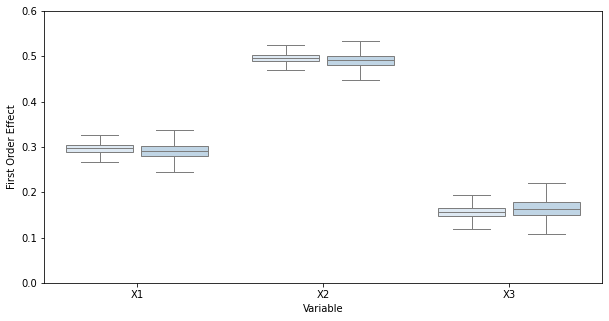

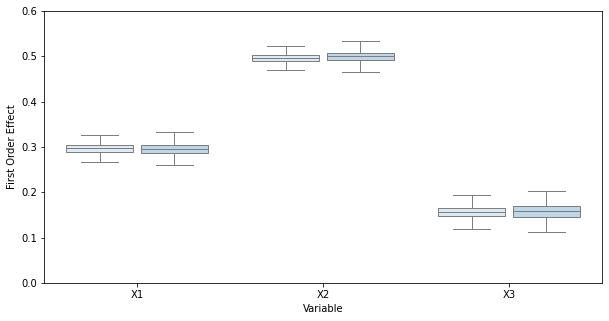

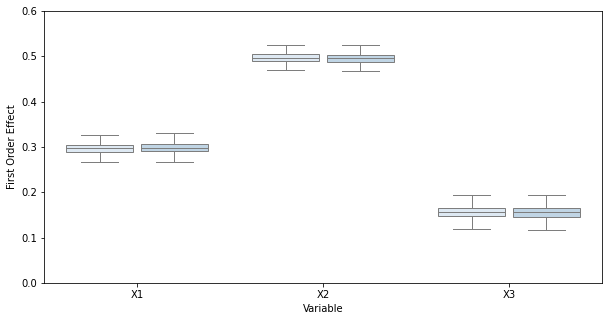

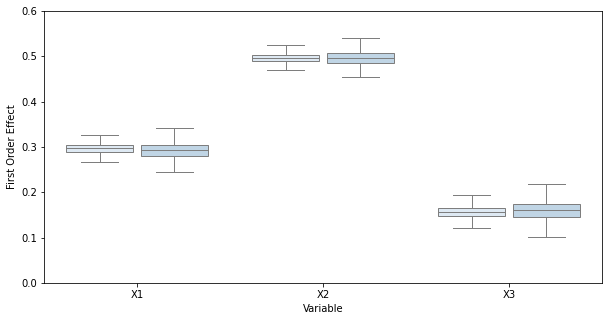

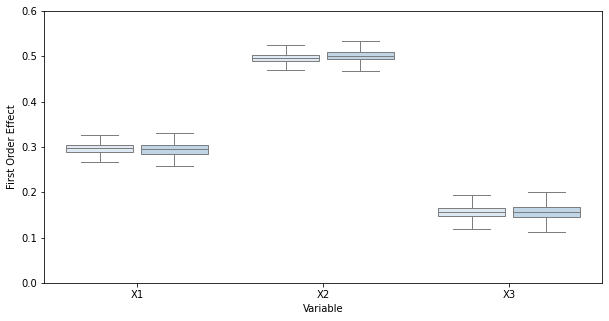

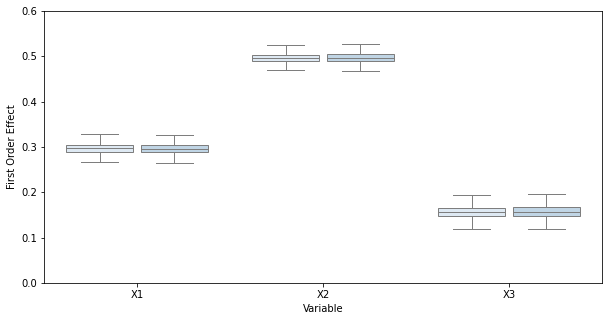

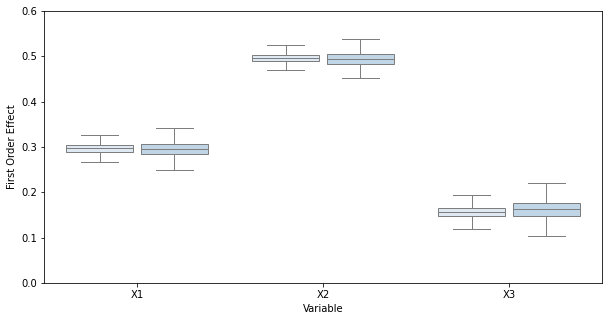

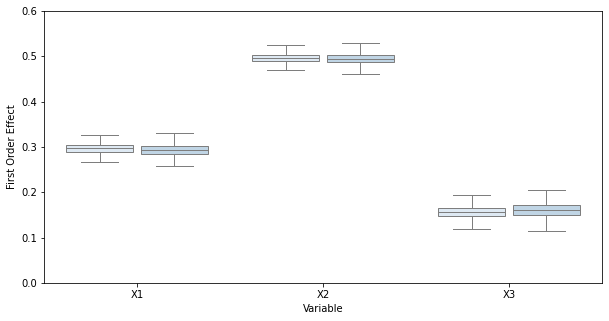

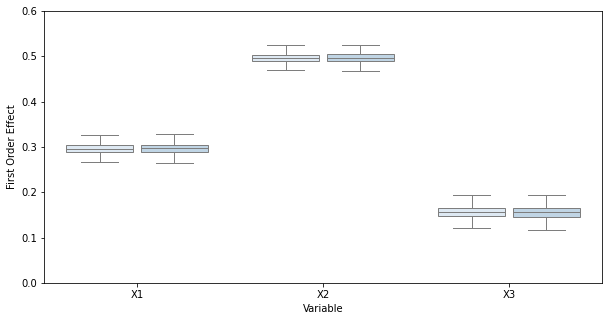

In [5]:
for x in ['X1','X2','X3']: #0.4,0.7,
    for p in [0.4,0.7,0.9]:
        print(x+ ' is missing')
        print()
        print(p)
        single_sobol = singleton(df,x,n,1,'complete')
        single_sobol_cc = singleton(df,x,n,p,'cc')

    
  
        cdf = pd.concat([single_sobol, single_sobol_cc],axis=0)  
    
        dd = pd.melt(cdf, id_vars= ['sample'],value_vars=['X1','X2','X3'],var_name='Variable')
        dd = dd.rename(columns={'value':'First Order Effect'})
        
        dd.to_csv(f'simulation/mcar_run/{x}_mcar_{p}.csv')
 
        fig, ax = plt.subplots(1, 1,figsize=(10, 5))
    
        ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'
        ax.legend_.remove()
        ax.set(ylim=(0, 0.6))
        fig = ax.get_figure()
        adjust_box_widths(fig, 0.9)
        fig.savefig('simulation/mcar/MCAR_'+str(x)+'_'+str(p)+'.pdf',transparent=True,bbox_inches='tight')


In [6]:
dX14 = pd.read_csv(f'simulation/mcar_run/{x}_mcar_0.4.csv')

30000
30000


<ipython-input-8-7f767e24e786>:19: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dp,hue='prob',palette=sns.color_palette('Blues'),showfliers = False,hue_order=[1,0.9,0.7,0.4]) #"Blues" "cubehelix" flare_r'


30000
30000


<ipython-input-8-7f767e24e786>:19: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dp,hue='prob',palette=sns.color_palette('Blues'),showfliers = False,hue_order=[1,0.9,0.7,0.4]) #"Blues" "cubehelix" flare_r'


30000
30000


<ipython-input-8-7f767e24e786>:19: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dp,hue='prob',palette=sns.color_palette('Blues'),showfliers = False,hue_order=[1,0.9,0.7,0.4]) #"Blues" "cubehelix" flare_r'


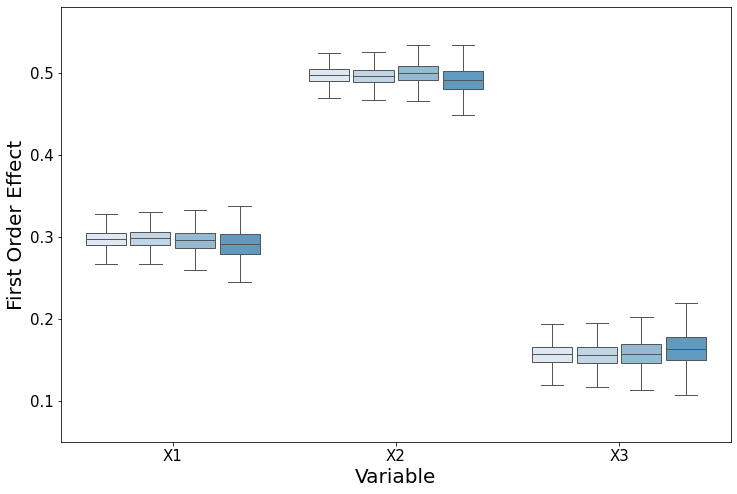

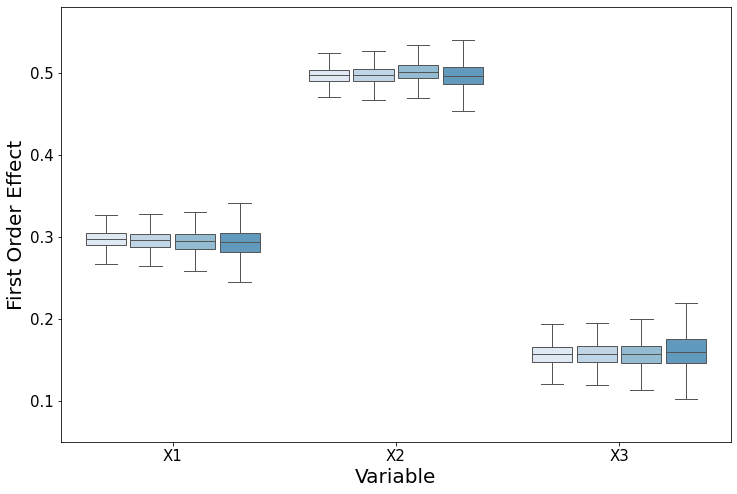

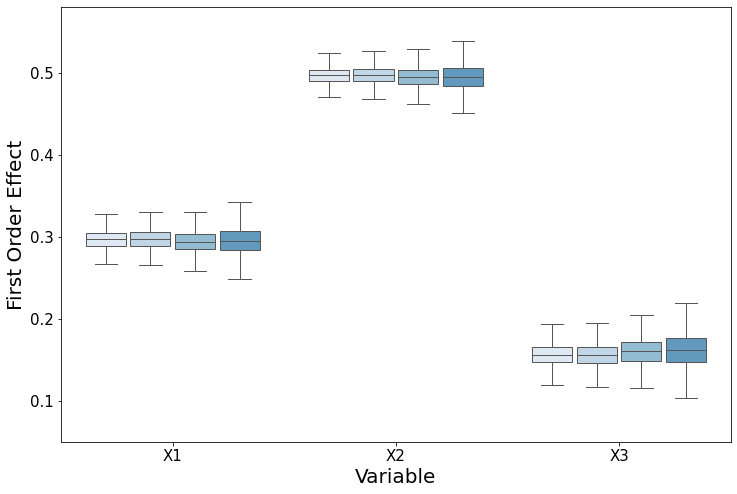

In [8]:
for x in ['X1','X2','X3']:
    dX14 = pd.read_csv(f'simulation/mcar_run/{x}_mcar_0.4.csv')
    dX14['prob'] =  dX14['sample'].apply(lambda x: 1 if x =='complete' else 0.4)

    dX16 = pd.read_csv(f'simulation/mcar_run/{x}_mcar_0.7.csv')
    dX16 = dX16.loc[(dX16['sample']=='cc')]
    dX16['prob'] = 0.7
    print(len(dX16))

    dX19 = pd.read_csv(f'simulation/mcar_run/{x}_mcar_0.9.csv')
    dX19 = dX19.loc[(dX19['sample']=='cc')]
    dX19['prob'] = 0.9
    print(len(dX19))

    dp = pd.concat([dX14,dX16,dX19],axis=0,ignore_index=False)
    
    fig, ax = plt.subplots(1, 1,figsize=(12, 8))
    
    ax = sns.boxplot(x='Variable',y='First Order Effect',data=dp,hue='prob',palette=sns.color_palette('Blues'),showfliers = False,hue_order=[1,0.9,0.7,0.4]) #"Blues" "cubehelix" flare_r'
    ax.legend_.remove()
    ax.set(ylim=(0.05, 0.58))
    fig = ax.get_figure()
    adjust_box_widths(fig, 0.9)
    plt.xticks(fontsize = 15) 
    plt.yticks(fontsize = 15) 
    ax.set_xlabel('Variable', fontsize = 20) 
    ax.set_ylabel('First Order Effect', fontsize = 20) 
    fig.savefig(f'simulation/mcar/{x}_MCAR_p.pdf',transparent=True,bbox_inches='tight')

In [40]:
### Higher order Sobols
big_list = []
request = [['X3'],['X1'],['X2']] # ,

for r in request:
    sobol_list = []
    for x in range(sim):
        df1 = df.copy()
        df_pf       = dataset(n,df).picked(r,a,b)
        df1['Y']    =dataset(n,df1).ishigami(eps)(a,b)
        df_pf['Y'] = dataset(n,df_pf).ishigami(eps)(a,b)
        sobol_list.append((np.cov(df1.Y,df_pf.Y,bias=True)/np.var(df1.Y))[0][1])
    big_list.append(sobol_list)

[[0.9574821595689051,
  0.9012609027353217,
  1.069244924381335,
  0.9943724254366298,
  0.9628568639472069,
  0.8874546139058751,
  0.9305875979485041,
  0.9003286992077565,
  0.8833701642027247,
  0.8570789789643547,
  0.9700032307360591,
  0.9570737669896031,
  0.9016549694100813,
  0.8600967544055834,
  0.8465377286068847,
  0.7975245707566938,
  0.9855236249500303,
  0.9576591236033754,
  0.9494744617229627,
  0.9317104437010877,
  0.9265559351969453,
  0.9342385792040955,
  0.9529416290961883,
  0.9479918099922698,
  0.9748059643957447,
  1.0131384496140794,
  0.8405501837227928,
  0.9781629226605858,
  0.8726838075013409,
  0.9790380579661436,
  0.9782612832286801,
  0.9059180787074179,
  0.9766823736637359,
  0.8709802740927135,
  0.9355862834830865,
  0.9877305001837543,
  0.9405811416605755,
  0.866739285491138,
  0.9384653851169098,
  0.9311467530146269,
  0.903896544718439,
  0.8628521585401432,
  0.9411121759432075,
  0.929379312664855,
  0.9325605178548161,
  0.8986380042

In [ ]:


    
    
        
        
        
        
    return sobol_list

def singletons(df,n1,sim,a,b,eps):
    singleton = []
    for x in [['X2','X3'],['X1','X3'],['X1','X2']]:
        singleton.append(sobol(df,n1,x,sim,a,b,eps))
    return pd.DataFrame(dict(zip(['X1','X2','X3'],singleton)))

def higher_sobol(df,n1,sim,a,b,eps):
    singleton = []
    for x in [['X3'],['X1'],['X2'],[]]:
        singleton.append(sobol(df,n1,x,sim,a,b,eps))
    return pd.DataFrame(dict(zip(['X1_X2','X2_X3','X1_X3','X1_X2_X3'],singleton)))